# Financial inclusion project 

Importing dependencies
Reading data
Data analysis
Data preprocessing
Data

In [40]:
# Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Data Reading

In [41]:
data = pd.read_csv('Train_v2.csv')

test = pd.read_csv('Test_v2.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Data Information

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# Summary statistics

In [43]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


# Data analytics

In [44]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

<Axes: xlabel='bank_account', ylabel='count'>

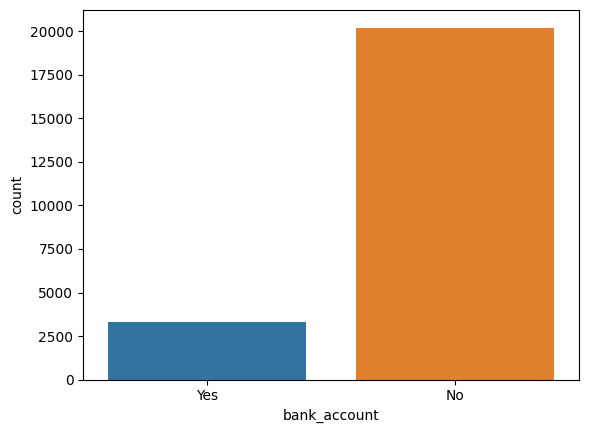

In [45]:
sn.countplot(data, x = 'bank_account')

<Axes: xlabel='location_type', ylabel='count'>

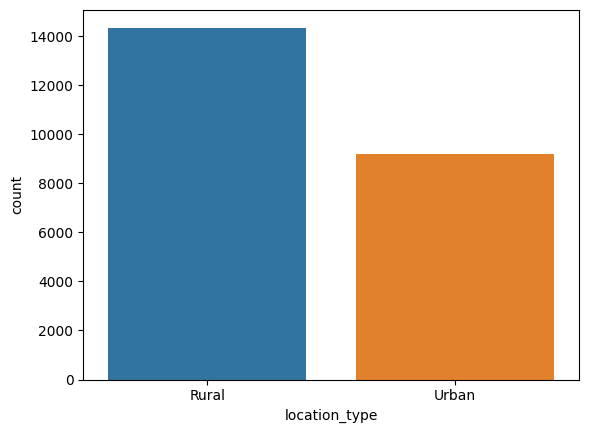

In [46]:
sn.countplot(data, x = 'location_type')

<Axes: xlabel='household_size'>

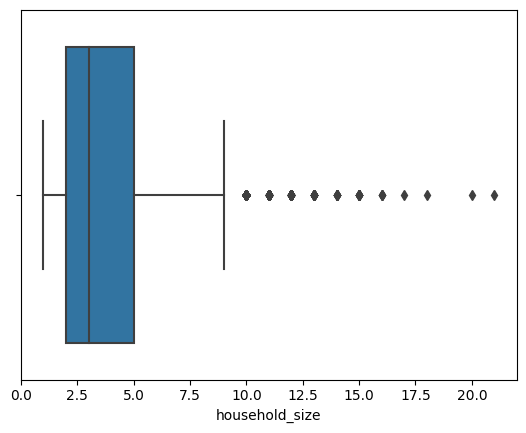

In [47]:
sn.boxplot(data, x = 'household_size')

<Axes: xlabel='education_level', ylabel='count'>

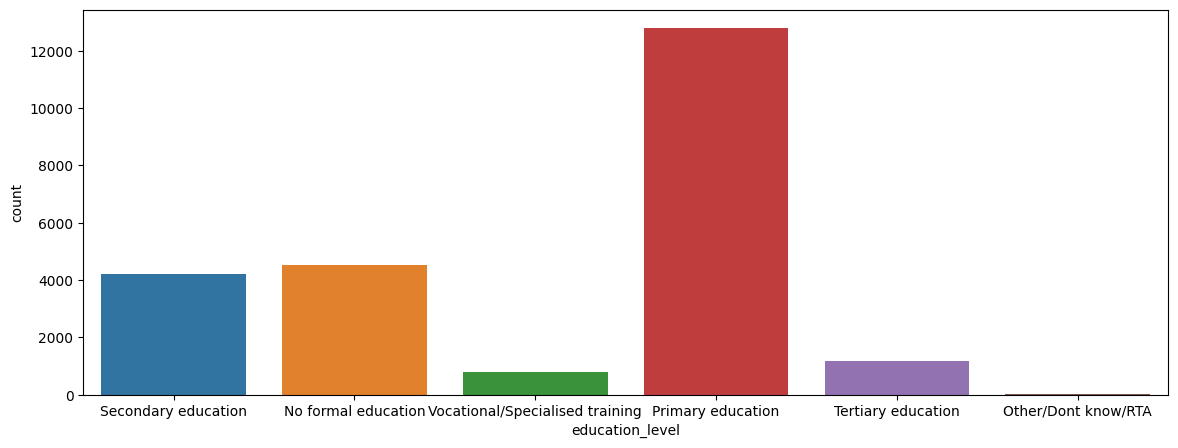

In [48]:
plt.figure(figsize=(14, 5))
sn.countplot(data, x = 'education_level')

# Feature engineering

In [49]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [50]:
data.drop(['uniqueid', 'year'], axis = 1, inplace =True)

In [51]:
data_copy = data.copy()

In [52]:
data_copy

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [53]:
data_copy['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [54]:
X = data_copy.drop('bank_account', axis = 1)
y = data_copy.bank_account

In [55]:
y

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23519     No
23520     No
23521     No
23522     No
23523     No
Name: bank_account, Length: 23524, dtype: object

In [56]:
#label encoder
obj_features = X.select_dtypes(include = 'O').columns.to_list()
le = LabelEncoder()
y = le.fit_transform(y)
for obj in obj_features:
    X[obj] = le.fit_transform(X[obj])

In [57]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [58]:
scaler = StandardScaler()
for f in ['age_of_respondent', 'household_size']:
    X[f] = scaler.fit_transform(X[[f]])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
smote = SMOTE(random_state=13)
x_resample, y_resample = smote.fit_resample(x_train, y_train)

In [61]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

lr_params ={'C': [0.0001, .001, .01, 0, .1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'lbfgs']
    }

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_params, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
result = best_model.predict(x_test)


print(best_params)
print(accuracy_score(y_test, result))

lr_params ={'C': [0.0001, .001, .01, 0, .1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'lbfgs']
    }

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_params, n_jobs=-1)
grid_search.fit(x_resample, y_resample)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
result = best_model.predict(x_test)


print(best_params)
print(accuracy_score(y_test, result))

# Baseline Model

In [62]:
xg = XGBClassifier(objective='binary:logistic', max_depth = 3, learning_rate = 0.1, n_estimators = 100)

xg.fit(x_train, y_train)
pred = xg.predict(x_test)

print(accuracy_score(y_test, pred))
print()
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print()

0.8892667375132838

[[3981   86]
 [ 435  203]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4067
           1       0.70      0.32      0.44       638

    accuracy                           0.89      4705
   macro avg       0.80      0.65      0.69      4705
weighted avg       0.87      0.89      0.87      4705




In [63]:
# Baseline model
def model(model, x_train, y_train):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    
    print('accuracy score: ', accuracy_score(y_test, result))
    print()
    print(confusion_matrix(y_test, result))
    print()
    print(classification_report(y_test, result))

In [64]:
model(LogisticRegression(random_state=10), x_train, y_train)

accuracy score:  0.8792773645058448

[[3992   75]
 [ 493  145]]

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4067
           1       0.66      0.23      0.34       638

    accuracy                           0.88      4705
   macro avg       0.77      0.60      0.64      4705
weighted avg       0.86      0.88      0.85      4705

